In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Unzipping the file
with zipfile.ZipFile('2009.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Checking the extracted files
extracted_files = !ls
print('Extracted files:', extracted_files)

Extracted files: ["'ls' is not recognized as an internal or external command,", 'operable program or batch file.']


In [2]:
# Loading the CSV file to preview its contents
df_2009 = pd.read_csv('2009.csv')

# Displaying the first few rows of the dataframe
df_2009_head = df_2009.head()
print(df_2009_head)

      FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0  2009-01-01         XE               1204    DCA  EWR          1100   
1  2009-01-01         XE               1206    EWR  IAD          1510   
2  2009-01-01         XE               1207    EWR  DCA          1100   
3  2009-01-01         XE               1208    DCA  EWR          1240   
4  2009-01-01         XE               1209    IAD  EWR          1715   

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  ...  CRS_ELAPSED_TIME  \
0    1058.0       -2.0      18.0      1116.0  ...              62.0   
1    1509.0       -1.0      28.0      1537.0  ...              82.0   
2    1059.0       -1.0      20.0      1119.0  ...              70.0   
3    1249.0        9.0      10.0      1259.0  ...              77.0   
4    1705.0      -10.0      24.0      1729.0  ...             105.0   

   ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
0                 68.0      42.0     199.0            NaN 

In [3]:
# Calculating the sum and mean of each delay type
delay_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_summary = df_2009[delay_columns].agg(['sum', 'mean'])
print(delay_summary)

      CARRIER_DELAY  WEATHER_DELAY     NAS_DELAY  SECURITY_DELAY  \
sum    1.810316e+07   3.225415e+06  1.924698e+07    75009.000000   
mean   1.546616e+01   2.755585e+00  1.644337e+01        0.064083   

      LATE_AIRCRAFT_DELAY  
sum          2.286872e+07  
mean         1.953755e+01  


In [4]:
# Converting FL_DATE to datetime and extracting month
df_2009['FL_DATE'] = pd.to_datetime(df_2009['FL_DATE'])
df_2009['MONTH'] = df_2009['FL_DATE'].dt.month

# Calculating total flights and cancelled flights per month
cancellation_trend = df_2009.groupby('MONTH').agg(Total_Flights=('FL_DATE', 'count'), Cancelled_Flights=('CANCELLED', 'sum'))
print(cancellation_trend)

       Total_Flights  Cancelled_Flights
MONTH                                  
1             532339            12430.0
2             488410             6092.0
3             557422            11682.0
4             537793             7974.0
5             546832             4792.0
6             557594             8282.0
7             580134             6838.0
8             568301             5618.0
9            1021704             5868.0
11            509540             2732.0
12            529269            14730.0


In [5]:
# Calculating average delay per month for each type of delay
delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
monthly_delay_patterns = df_2009.groupby('MONTH')[delay_types].mean()
print(monthly_delay_patterns)

       CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
MONTH                                                            
1          14.296182       3.380338  16.221865        0.059739   
2          14.576780       1.944831  18.376426        0.046166   
3          14.578625       2.654877  17.277838        0.058003   
4          14.703606       3.441961  19.647949        0.040475   
5          13.696826       2.367889  17.549946        0.049023   
6          15.993710       3.372549  17.506144        0.065679   
7          16.583609       2.722710  15.524652        0.057655   
8          16.618009       2.619623  15.353121        0.105064   
9          16.834636       2.144214  14.381085        0.045160   
11         17.126215       1.316277  13.870278        0.034271   
12         15.082904       3.347417  15.370482        0.115331   

       LATE_AIRCRAFT_DELAY  
MONTH                       
1                17.691034  
2                17.601957  
3                20.61879

In [6]:
# Calculating overall average delay per flight
total_average_delay = df_2009[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].mean().mean()

# Calculating cancellation rate
total_flights = df_2009['FL_DATE'].count()
total_cancellations = df_2009['CANCELLED'].sum()
cancellation_rate = (total_cancellations / total_flights) * 100

# Calculating on-time performance
ontime_flights = df_2009[df_2009['DEP_DELAY'].fillna(0) <= 0].count()['FL_DATE']
ontime_rate = (ontime_flights / total_flights) * 100

print(f'Total Average Delay: {total_average_delay:.2f} minutes')
print(f'Cancellation Rate: {cancellation_rate:.2f}%')
print(f'On-Time Performance: {ontime_rate:.2f}%')

Total Average Delay: 10.85 minutes
Cancellation Rate: 1.35%
On-Time Performance: 64.93%


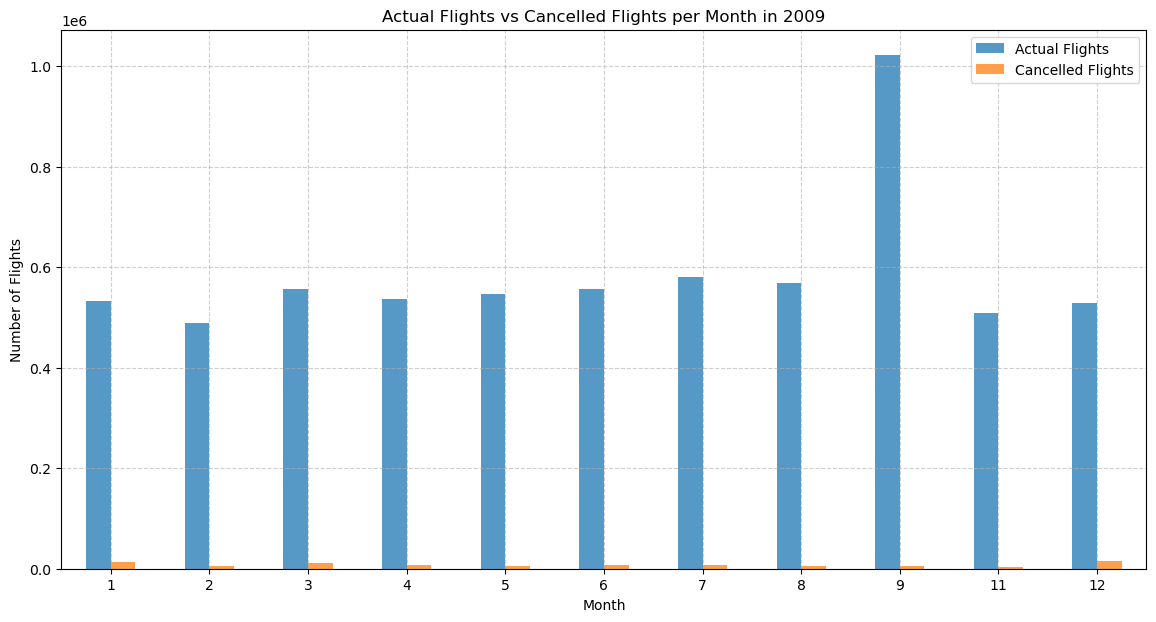

In [7]:
# Plotting the data
cancellation_trend.plot(kind='bar', figsize=(14, 7), alpha=0.75)
plt.title('Actual Flights vs Cancelled Flights per Month in 2009')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.legend(['Actual Flights', 'Cancelled Flights'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

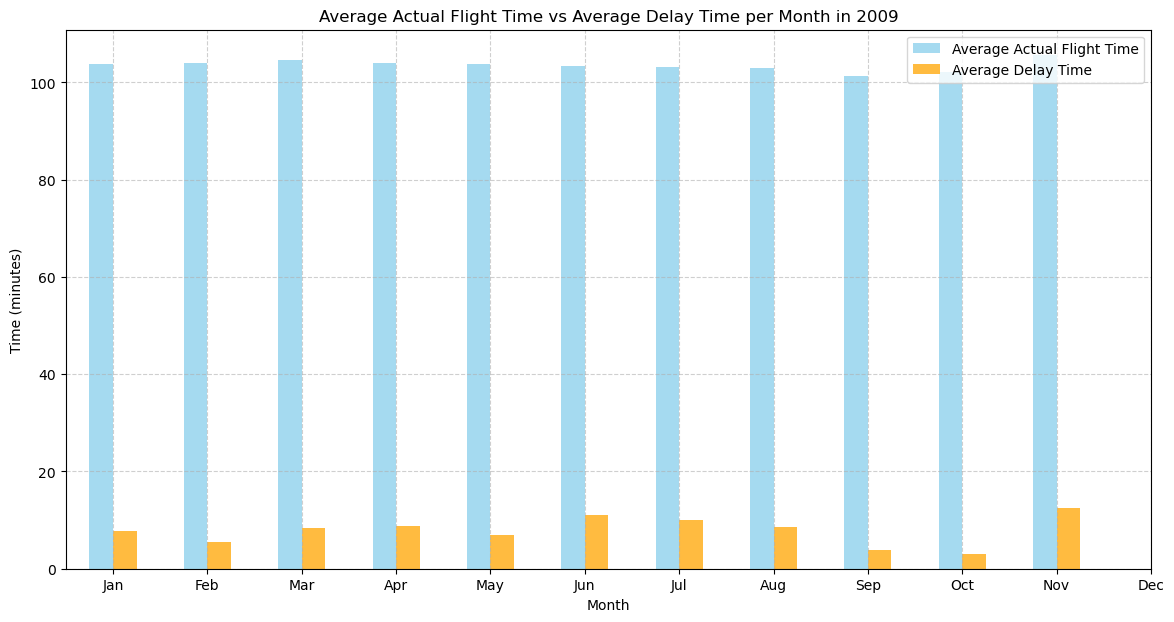

In [8]:

# Creating a DataFrame for plotting
plot_data = df_2009.groupby('MONTH').agg({'AIR_TIME': 'mean', 'DEP_DELAY': 'mean'})

# Plotting the data
plot_data.plot(kind='bar', figsize=(14, 7), alpha=0.75, color=['skyblue', 'orange'])
plt.title('Average Actual Flight Time vs Average Delay Time per Month in 2009')
plt.xlabel('Month')
plt.ylabel('Time (minutes)')
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(['Average Actual Flight Time', 'Average Delay Time'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [9]:
# Calculating average delay and cancellation rate per destination airport
destination_stats = df_2009.groupby('DEST').agg({'DEP_DELAY': 'mean', 'CANCELLED': 'mean'})

# Sorting by average delay and cancellation rate
destination_stats_sorted = destination_stats.sort_values(by=['DEP_DELAY', 'CANCELLED'], ascending=False)

# Selecting the top 10 worst destinations
top_10_worst_destinations = destination_stats_sorted.head(10)

print(top_10_worst_destinations)

      DEP_DELAY  CANCELLED
DEST                      
EWR   20.047394   0.024983
LWB   19.368421   0.000000
EYW   15.429094   0.006369
CIC   15.023686   0.028058
MOD   14.720859   0.032758
DAB   12.857009   0.008841
CDV   12.696801   0.009642
MHK   12.674699   0.023529
LGA   12.625339   0.039193
PHF   12.463734   0.013418
